Epoch 1/20


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


462/462 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4128 - loss: 1.2967 - val_accuracy: 0.5573 - val_loss: 1.0410
Epoch 2/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5989 - loss: 0.9611 - val_accuracy: 0.6025 - val_loss: 0.9322
Epoch 3/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6452 - loss: 0.8599 - val_accuracy: 0.6298 - val_loss: 0.8758
Epoch 4/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6772 - loss: 0.7899 - val_accuracy: 0.6461 - val_loss: 0.8337
Epoch 5/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7087 - loss: 0.7222 - val_accuracy: 0.6642 - val_loss: 0.7977
Epoch 6/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7366 - loss: 0.6527 - val_accuracy: 0.6805 - val_loss: 0.7818
Epoch 7/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7612 - loss: 0.6027 - val_accuracy: 0.6872 - val_loss: 0.8024
Epoch 8/20
462/462 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7896 - loss: 0.5362 - val_accuracy: 0.678

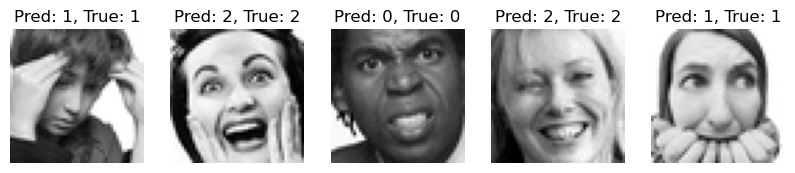

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

gestures = np.load(r"gesture_detection-20241120T085625Z-001\gesture_detection\train_validation\train_gesture.npy")  # Assuming gestures are in .npy format (images)
labels = np.load(r"gesture_detection-20241120T085625Z-001\gesture_detection\train_validation\train_gesture_labels.npy")  # Assuming labels are in .npy format (numeric labels)

gestures = gestures.astype('float32') / 255.0

num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes)

gestures = gestures.reshape(-1, 48, 48, 1)  # (batch_size, height, width, channels)
X_train, X_test, y_train, y_test = train_test_split(gestures, labels, test_size=0.2, random_state=42)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),  # (height, width, channels)
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  

import matplotlib.pyplot as plt

num_images = 5  # Number of images to show
plt.figure(figsize=(10, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i].reshape(48, 48), cmap='gray')  # Reshape to 48x48 for display
    plt.title(f"Pred: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.axis('off')

plt.show()